Importing dependent libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection & Processing

In [21]:
car_dataset = pd.read_csv('C:/Users/SONY/Documents/CSV_Files/car_data.csv')
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
car_dataset.shape

(301, 9)

In [23]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [24]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [25]:
#checking distribution of categorical data
print(car_dataset['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [26]:
print(car_dataset['Seller_Type'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [27]:
print(car_dataset['Transmission'].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


ml dose not understand and work with categorical , we have to encoding the data
Encoding the categorical data

In [29]:
# Encoding 'fuel_type' column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Encoding 'seller_type' column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# Encoding 'transmission' column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [30]:
car_dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


splitting the data and target

In [31]:
x=car_dataset[['Year','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']].values
x

array([[2014.  ,    3.35,    5.59, ...,    0.  ,    0.  ,    0.  ],
       [2013.  ,    4.75,    9.54, ...,    0.  ,    0.  ,    0.  ],
       [2017.  ,    7.25,    9.85, ...,    0.  ,    0.  ,    0.  ],
       ...,
       [2009.  ,    3.35,   11.  , ...,    0.  ,    0.  ,    0.  ],
       [2017.  ,   11.5 ,   12.5 , ...,    0.  ,    0.  ,    0.  ],
       [2016.  ,    5.3 ,    5.9 , ...,    0.  ,    0.  ,    0.  ]])

In [32]:
y=car_dataset['Selling_Price'].values
y

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  2.85,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  7.25,  7.75,
        3.25,  2.65,  2.85,  4.9 ,  4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,
        6.  ,  1.95,  7.45,  3.1 ,  2.35,  4.95,  6.  ,  5.5 ,  2.95,
        4.65,  0.35,  3.  ,  2.25,  5.85,  2.55,  1.95,  5.5 ,  1.25,
        7.5 ,  2.65,  1.05,  5.8 ,  7.75, 14.9 , 23.  , 18.  , 16.  ,
        2.75,  3.6 ,  4.5 ,  4.75,  4.1 , 19.99,  6.95,  4.5 , 18.75,
       23.5 , 33.  ,  4.75, 19.75,  9.25,  4.35, 14.25,  3.95,  4.5 ,
        7.45,  2.65,  4.9 ,  3.95,  5.5 ,  1.5 ,  5.25, 14.5 , 14.73,
        4.75, 23.  , 12.5 ,  3.49,  2.5 , 35.  ,  5.9 ,  3.45,  4.75,
        3.8 , 11.25,  3.51, 23.  ,  4.  ,  5.85, 20.75, 17.  ,  7.05,
        9.65,  1.75,  1.7 ,  1.65,  1.45,  1.35,  1.35,  1.35,  1.25,
        1.2 ,  1.2 ,  1.2 ,  1.15,  1.15,  1.15,  1.15,  1.11,  1.1 ,
        1.1 ,  1.1 ,  1.05,  1.05,  1.05,  1.05,  1.  ,  0.95,  0.9 ,
        0.9 ,  0.75,

Splitting training and testing data

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

Model Training

1.Linear Regression

In [37]:
#loading the linear regression model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Model Evaluate

In [39]:
# Prediction on training data
train_data_pred=model.predict(x_train)
# predicted data = x_train
# original data = y_train
# train_data_pred = y_pred

for regression we used R square method to check prediction and for classification we used Accuracy

In [40]:
#R square error
error_score = metrics.r2_score(y_train,train_data_pred)
print("R square error: ",error_score)

R square error:  1.0


Visualized the actual price and predicted price

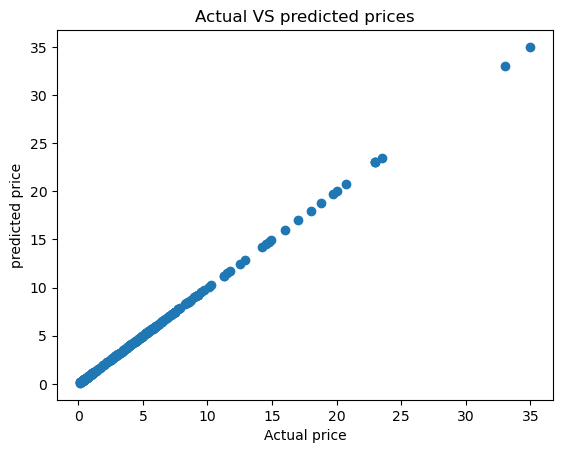

In [41]:
plt.scatter(y_train,train_data_pred)
plt.xlabel('Actual price')#y_train
plt.ylabel('predicted price')#y_pred
plt.title('Actual VS predicted prices')
plt.show()

this means our predicted value predicted by machine is very close as original value sold by owner

Now test the data

In [42]:
# Prediction on testing data
test_data_pred=model.predict(x_test)

In [43]:
#R square error
error_score = metrics.r2_score(y_test,test_data_pred)
print("R square error: ",error_score)

R square error:  1.0


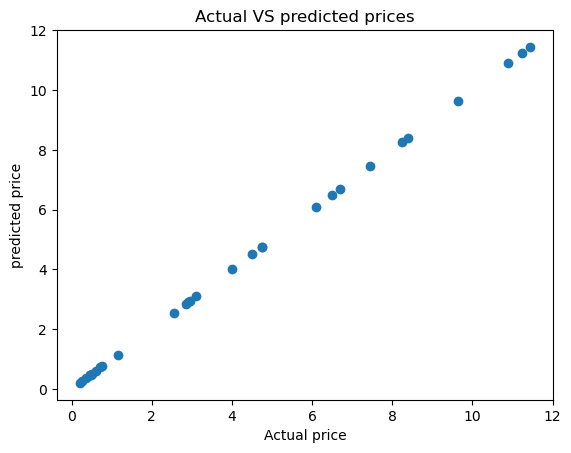

In [44]:
plt.scatter(y_test,test_data_pred)
plt.xlabel('Actual price')#y_train
plt.ylabel('predicted price')#y_pred
plt.title('Actual VS predicted prices')
plt.show()

there is messy data thats why we get this kind of visualization but this is good kind of prediction

2. Lasso Regression

In [46]:
#loading the lasso regression model
lasso_model = Lasso()
lasso_model.fit(x_train,y_train)

Lasso()

In [48]:
# Prediction on training data
train_data_pred=lasso_model.predict(x_train)

In [49]:
#R square error
error_score = metrics.r2_score(y_train,train_data_pred)
print("R square error: ",error_score)

R square error:  0.9980889823117651


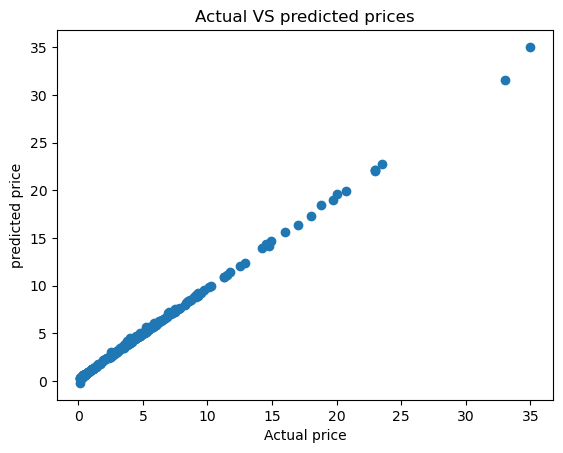

In [50]:
plt.scatter(y_train,train_data_pred)
plt.xlabel('Actual price')#y_train
plt.ylabel('predicted price')#y_pred
plt.title('Actual VS predicted prices')
plt.show()

In [51]:
# Prediction on testing data
test_data_pred=lasso_model.predict(x_test)

In [52]:
#R square error
error_score = metrics.r2_score(y_test,test_data_pred)
print("R square error: ",error_score)

R square error:  0.998070929791084


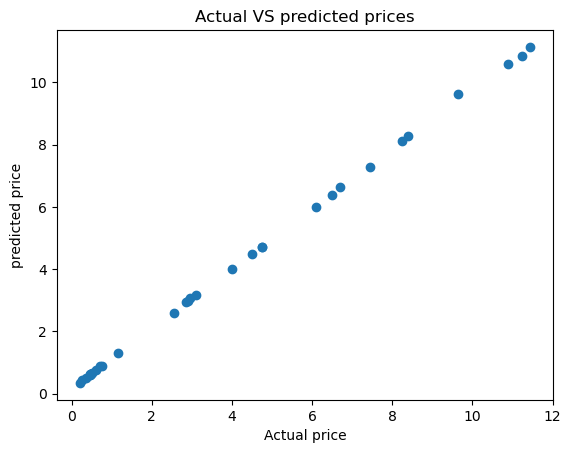

In [53]:
plt.scatter(y_test,test_data_pred)
plt.xlabel('Actual price')#y_train
plt.ylabel('predicted price')#y_pred
plt.title('Actual VS predicted prices')
plt.show()

this is very good fit in lasso regression , means it is best to use